In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

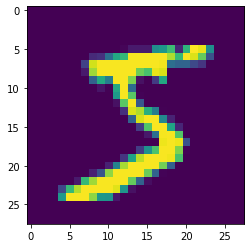

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [9]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

C:\Users\RW565TZ\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2493 - accuracy: 0.0856 - val_loss: 0.2099 - val_accuracy: 0.1185
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1904 - accuracy: 0.1550 - val_loss: 0.1672 - val_accuracy: 0.1913
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1608 - accuracy: 0.1964 - val_loss: 0.1543 - val_accuracy: 0.2072
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1488 - accuracy: 0.2145 - val_loss: 0.1427 - val_accuracy: 0.2213
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1421 - accuracy: 0.2229 - val_loss: 0.1379 - val_accuracy: 0.2260


In [11]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 145ms/step


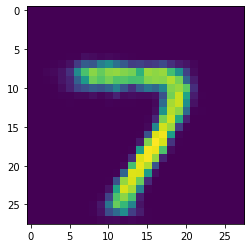

In [12]:
plt.imshow(passed_images[0])

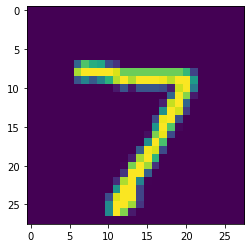

In [13]:
plt.imshow(X_test[0])

In [14]:
from tensorflow.keras.layers import GaussianNoise

In [17]:
sample = GaussianNoise(0.2)
noisey = sample(X_test[0:2],training=True)

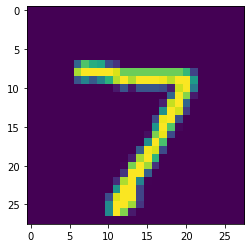

In [18]:
plt.imshow(X_test[0])

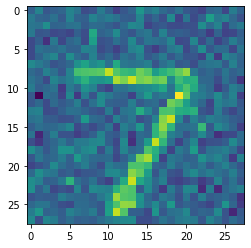

In [19]:
plt.imshow(noisey[0])

In [21]:
import tensorflow as tf

In [22]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [23]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [24]:
noise_remover = Sequential([encoder, decoder])

In [25]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [26]:
noise_remover.fit(X_train, X_train, epochs=8,validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 19s 9ms/step - loss: 0.1696 - accuracy: 0.1815 - val_loss: 0.1353 - val_accuracy: 0.2202
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1303 - accuracy: 0.2318 - val_loss: 0.1209 - val_accuracy: 0.2395
Epoch 3/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1209 - accuracy: 0.2460 - val_loss: 0.1142 - val_accuracy: 0.2525
Epoch 4/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1160 - accuracy: 0.2545 - val_loss: 0.1104 - val_accuracy: 0.2614
Epoch 5/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1128 - accuracy: 0.2596 - val_loss: 0.1082 - val_accuracy: 0.2615
Epoch 6/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1098 - accuracy: 0.2646 - val_loss: 0.1052 - val_accuracy: 0.2679
Epoch 7/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1074 - accuracy: 0.2690 - val_loss: 0.1031 - val_accur

In [27]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


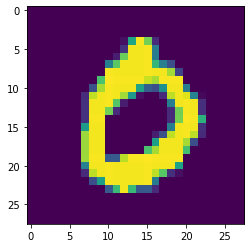

The Noisey Version


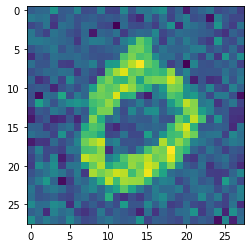

After going through denoiser


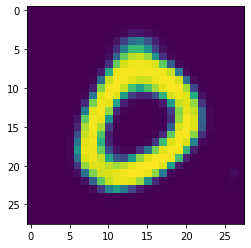

In [29]:
n = 3
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()